In [2]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [47]:
# reading data into a dataframe
df_fc = pd.read_csv(r'C:\Users\Administrator\Desktop\IBM_Notes\5.Machine Learning\2week\1.Linear Regression\FuelConsumptionCo2.csv')

# take a look  at the dataset
df_fc.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [48]:
# summarize the data
df_fc.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


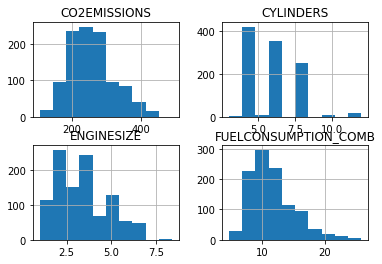

In [50]:
# plot each of the features
viz = df_fc[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

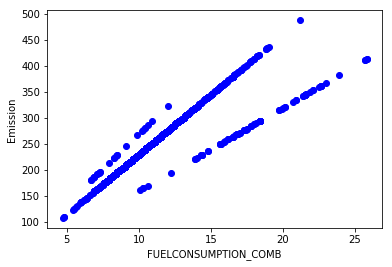

In [39]:
#plot each of these features vs the Emission, to see how linear is their relation:
plt.scatter(df_fc.FUELCONSUMPTION_COMB, df_fc.CO2EMISSIONS, color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emission')
plt.show()

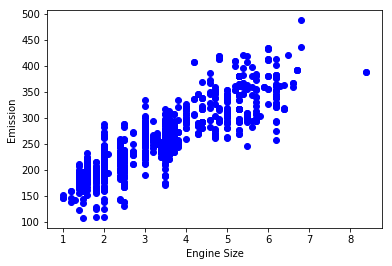

In [40]:
plt.scatter(df_fc.ENGINESIZE, df_fc.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

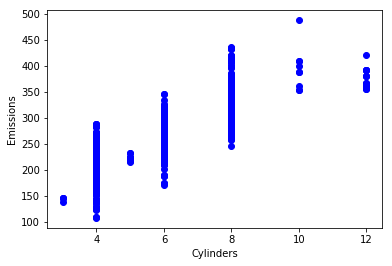

In [42]:
plt.scatter(df_fc.CYLINDERS, df_fc.CO2EMISSIONS, color = 'blue')
plt.xlabel('Cylinders')
plt.ylabel('Emissions')
plt.show()

In [51]:
# split dataset into train and test sets, 80% of the entire data for training, and the 20% for testing.
# create a mask to select random rows using np.random.rand() finction:
msk = np.random.rand(len(df_fc)) < 0.8
train = viz[msk]
test = viz[~msk]

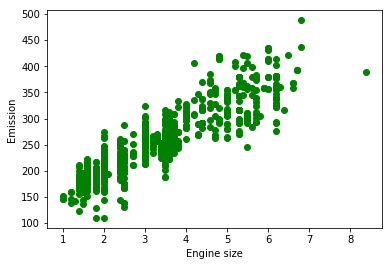

In [66]:
#selecting Engine Size vs Emission for Linear Regression  because in this case it minimize the residual
# sum of squares between independent x variable and  dependent y variable
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'green')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [67]:
# using sklearn  package to model data
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
# fit the data set x and y
regr.fit(train_x, train_y)
# the coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.5533725]]
Intercept:  [124.03119884]


Text(0, 0.5, 'Emission')

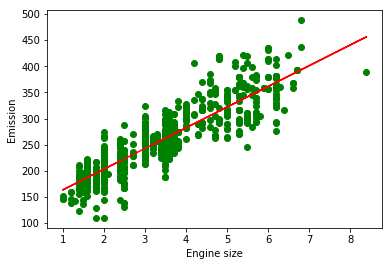

In [68]:
# plot the fit line over the data:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

In [76]:
# making a brief model evaluation with 3 popular metrics MAE,MSE and R^2 for this case
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print('Mean absolute error(MAE): %.2f' % np.mean(np.absolute(test_y_hat - test_y)))
print('Residual sum of squares (MSE): %.2f' % np.mean((test_y_hat - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_hat, test_y))

Mean absolute error(MAE): 27.14
Residual sum of squares (MSE): 1265.96
R2-score: 0.60
